### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [1]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [2]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [3]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [4]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


In [18]:
# necessary libraries
library(dplyr)
library(lubridate)
library(ggplot2)

### Question 1


**Which month of the year is the most common for bike share rentals, across all 3 sources?**
Because there are 3 source files, and we want to see the most popular month for each individually first, I'll start by creating a function to make the code reusable / reduce redundancy for the 3 source files.

In [34]:
# After the initial run of the function, the Washington data returned NA rows for month. 
# Because of that, the function below removes those rows, since we are looking at data at the month level,
# it isnt helpful to include those rows in our final analysis.

# Function that summarizes trips by month
summarize_monthly_trips <- function(data) {
  data %>%
    mutate(
      Start.Time = lubridate::ymd_hms(Start.Time), # datetime format
      Month = lubridate::month(Start.Time, label = TRUE, abbr = FALSE) # get month name
    ) %>%
    filter(!is.na(Month)) %>% # Remove rows where Month is NA
    group_by(Month) %>%
    summarise(Trip_Count = n()) %>%
    arrange(desc(Trip_Count)) # sorts by trip count
}


In [35]:
#Summarize trips by month for each dataset
chi_summary <- summarize_monthly_trips(chi)
ny_summary <- summarize_monthly_trips(ny)
wash_summary <- summarize_monthly_trips(wash)

In [36]:
chi_summary

Month,Trip_Count
June,2816
May,1905
April,1526
February,930
March,803
January,650


In [37]:
ny_summary

Month,Trip_Count
June,14000
May,12180
April,10661
February,6364
March,5820
January,5745


In [38]:
wash_summary

Month,Trip_Count
June,20335
April,18522
May,17072
March,12612
February,11563
January,8946


It looks like June is the most popular month for all 3 sources, but let's look at this as a bar chart. Similar to the table data, I'll create a function to reduce code redundancy. 

In [48]:
# function to create a bar chart for monthly trip counts
plot_monthly_trips <- function(monthly_data, name) {
  ggplot(monthly_data, aes(x = Month, y = Trip_Count, fill = Month)) +
    geom_bar(stat = "identity") +
    labs(
      title = paste("Most Popular Months for Travel in", name), #requires just the city/state name when running the function
      x = "Month",
      y = "Number of Trips"
    ) +
    theme_minimal()
}


In [49]:
chi_plot <- plot_monthly_trips(chi_summary, "Chicago")
ny_plot <- plot_monthly_trips(ny_summary, "New York City")
wash_plot <- plot_monthly_trips(wash_summary, "Washington")

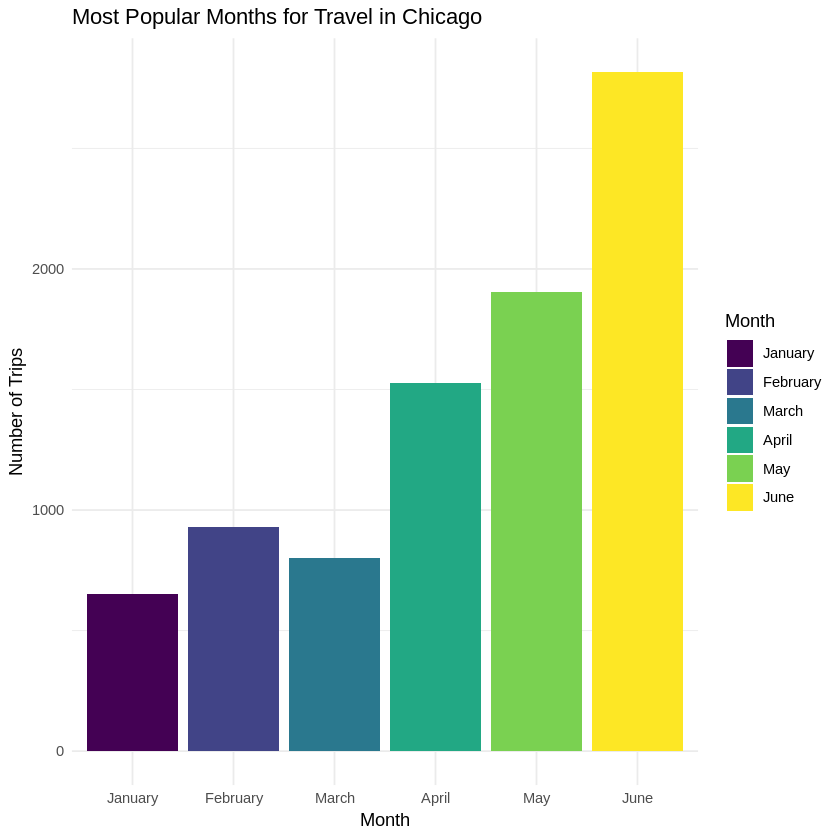

In [50]:
chi_plot

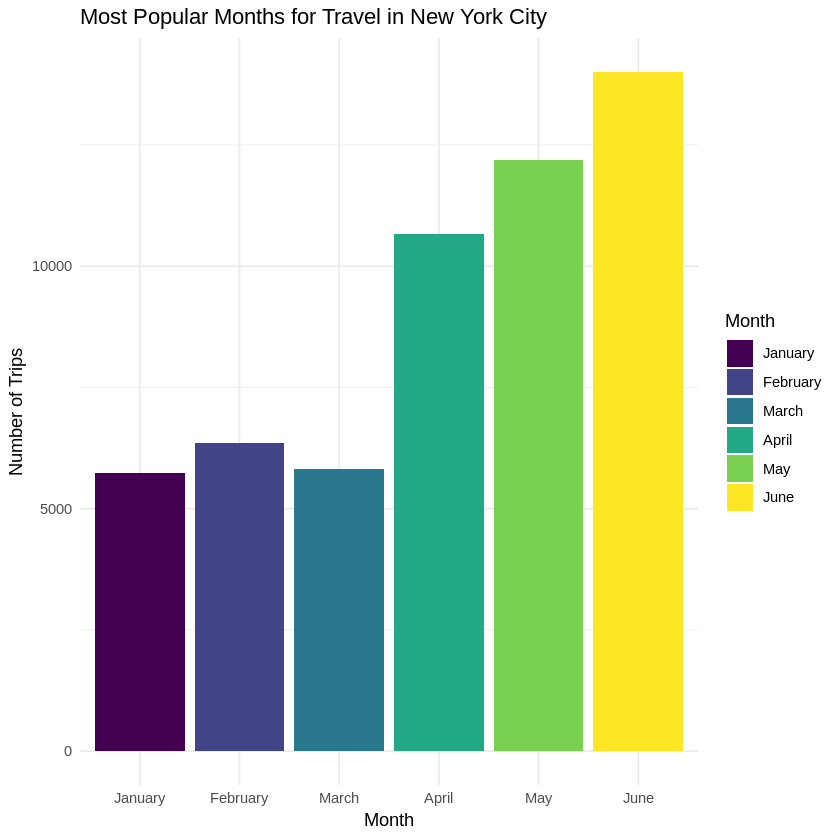

In [51]:
ny_plot

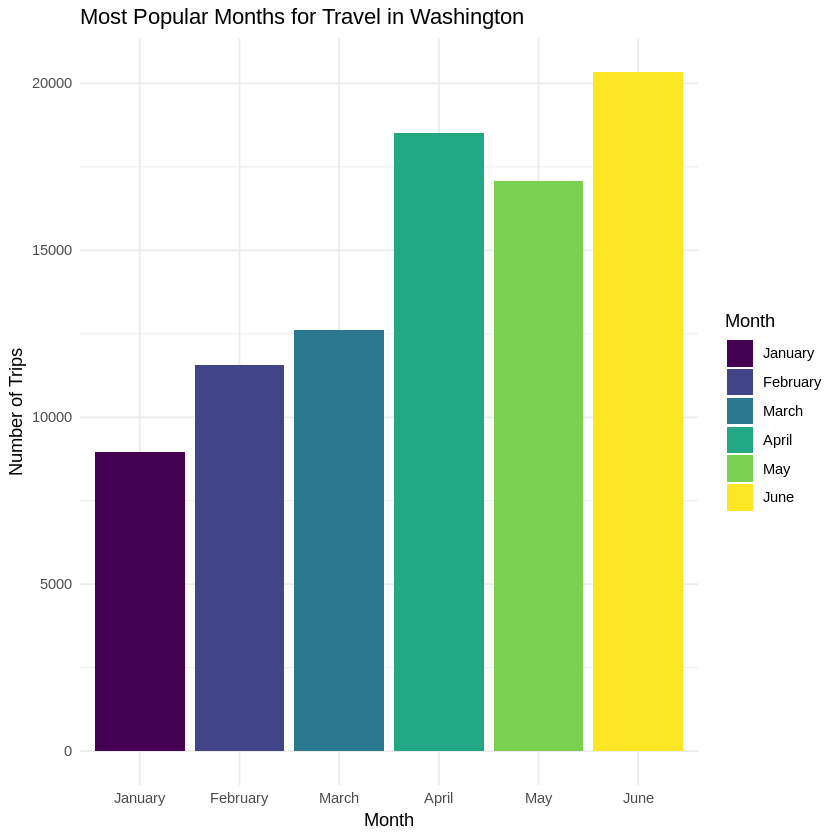

In [43]:
wash_plot

It looks like the most popular month across all data sources is June. For Washington however, the second most popular month is April. Where as the other 2 data sources the second most popular is May. Let's look at this data combined.

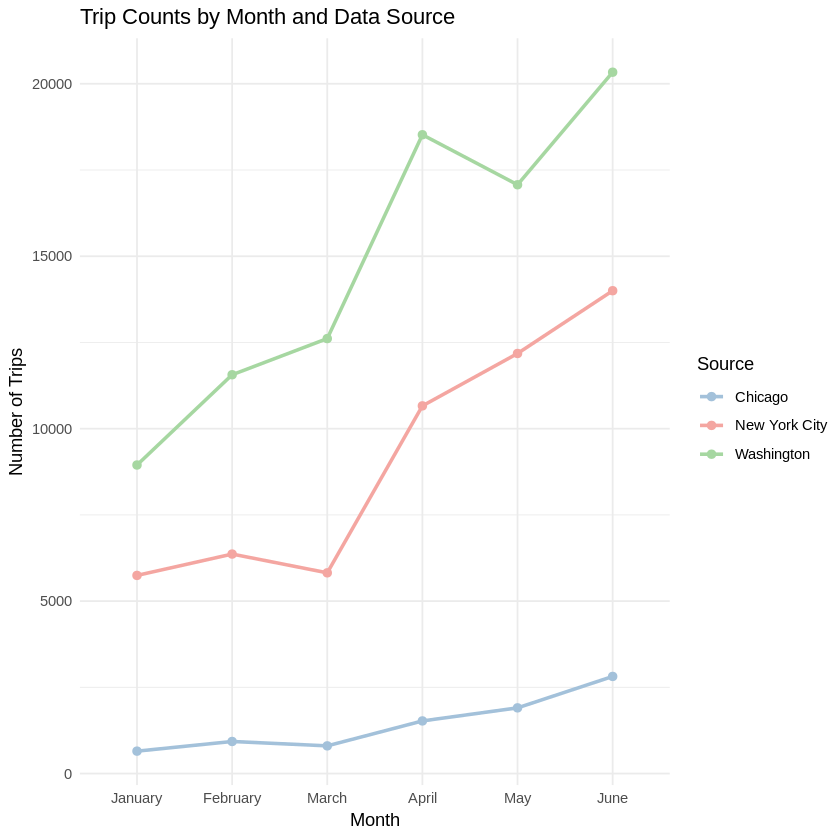

In [211]:
# add a source column to the sources to make them easy to identify
chi_summary$Source <- "Chicago"
ny_summary$Source <- "New York City"
wash_summary$Source <- "Washington"

# combine the sources into one dataframe
combined_data <- bind_rows(chi_summary, ny_summary, wash_summary)

# create a basic line graph to compare
ggplot(combined_data, aes(x = Month, y = Trip_Count, color = Source, group = Source)) +
  geom_line(size = 1) + #plots the line
  geom_point(size = 2) + #adds points for readability
  labs(
    title = "Trip Counts by Month and Data Source",
    x = "Month",
    y = "Number of Trips"
  ) +
  theme_minimal() +
  scale_color_manual(values = c("Chicago" = "#A3C1DA", "New York City" = "#F4A6A1", "Washington" = "#A6D7A1"))


**June is the most popular rental month for all 3 data sources. For the second most popular, Washington has April, and the others have May. What we can also see by looking at the combined line graph is that Washington overall has a lot more bike rentals than Chicago or New York City. This may seem suprising at first, given how large those cities are, but I'd speculate that this is likely due to Washington have multi-city data, rather than the individual city counts for Chicago and New York City. If we were to explore this further, I think it would be interesting to look at similar levels of data (city to city or state to state) as well as weather patters. It is likely that the warmer months would be more popular for bike rentals, but having average weather data for these locations would assist in confirming that.**

### Question 2

**What are the most popular stations across the data sources? We will look at the most popular start station as well as end station.**

I'll start with most popular starting station.

In [160]:
# function to get the most popular start station for a dataset
most_popular_station_start <- function(data) {
  data %>%
    group_by(Start.Station) %>%  # Group by start station
    summarise(Trip_Count = n()) %>%  # Count trip numbers
    arrange(desc(Trip_Count)) %>%  # Sort by top count
    head(5)  # Get top 5 stations
}

In [161]:
# Get the most popular start station for each dataset
chi_most_popular_start <- most_popular_station_start(chi)
ny_most_popular_start <- most_popular_station_start(ny)
wash_most_popular_start <- most_popular_station_start(wash)

In [162]:
chi_most_popular_start

Start.Station,Trip_Count
Streeter Dr & Grand Ave,210
Lake Shore Dr & Monroe St,140
Clinton St & Washington Blvd,120
Clinton St & Madison St,102
Canal St & Adams St,101


In [163]:
ny_most_popular_start

Start.Station,Trip_Count
Pershing Square North,592
W 21 St & 6 Ave,385
Broadway & E 22 St,383
E 17 St & Broadway,380
West St & Chambers St,364


In [164]:
wash_most_popular_start

Start.Station,Trip_Count
Columbus Circle / Union Station,1700
Lincoln Memorial,1546
Jefferson Dr & 14th St SW,1488
Massachusetts Ave & Dupont Circle NW,1219
Jefferson Memorial,1068


In [185]:
# Function to plot bar chart for most popular start stations
plot_most_popular_start <- function(data, source_name) {
  ggplot(data, aes(x = reorder(Start.Station, -Trip_Count), y = Trip_Count)) +  # order by Trip_Count
    geom_bar(stat = "identity", fill = "grey") +  
    labs(
      title = paste("Top 5 Most Popular Start Stations -", source_name),
      x = "Start Station",
      y = "Trip Count"
    ) +
    theme_minimal() +  # clean theme
    theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Rotate x-axis labels for better readability
}

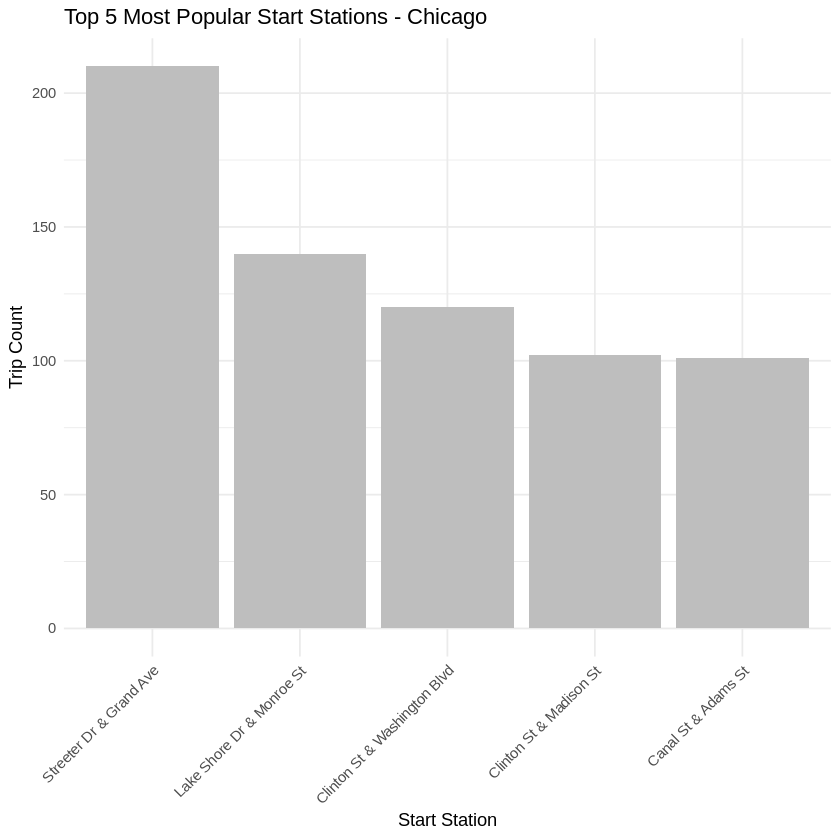

In [186]:
plot_most_popular_start(chi_most_popular_start, "Chicago")

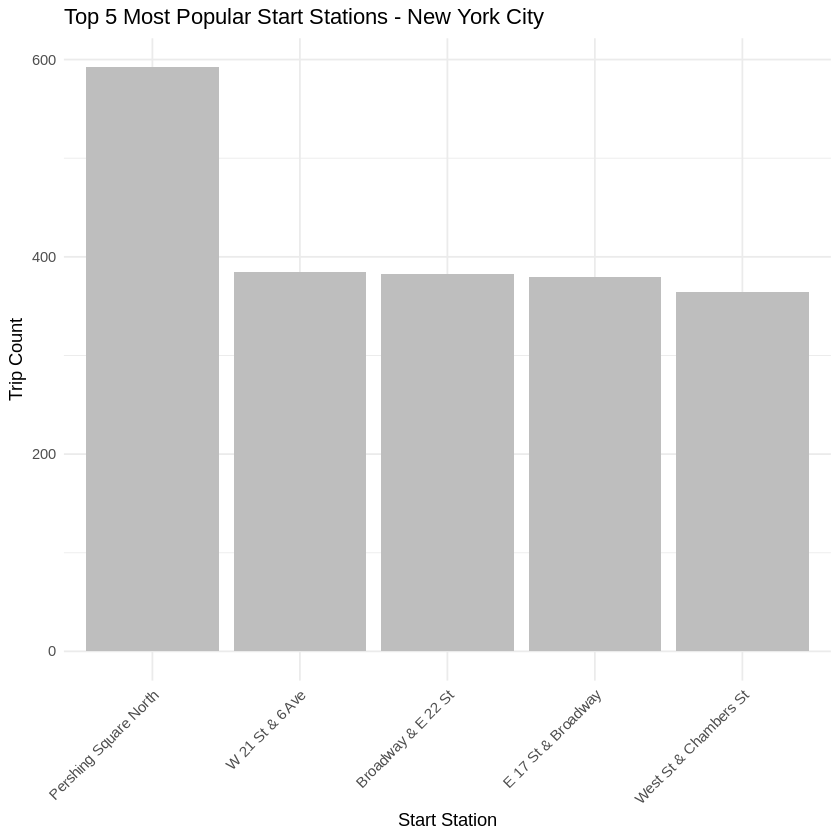

In [188]:
plot_most_popular_start(ny_most_popular_start, "New York City")

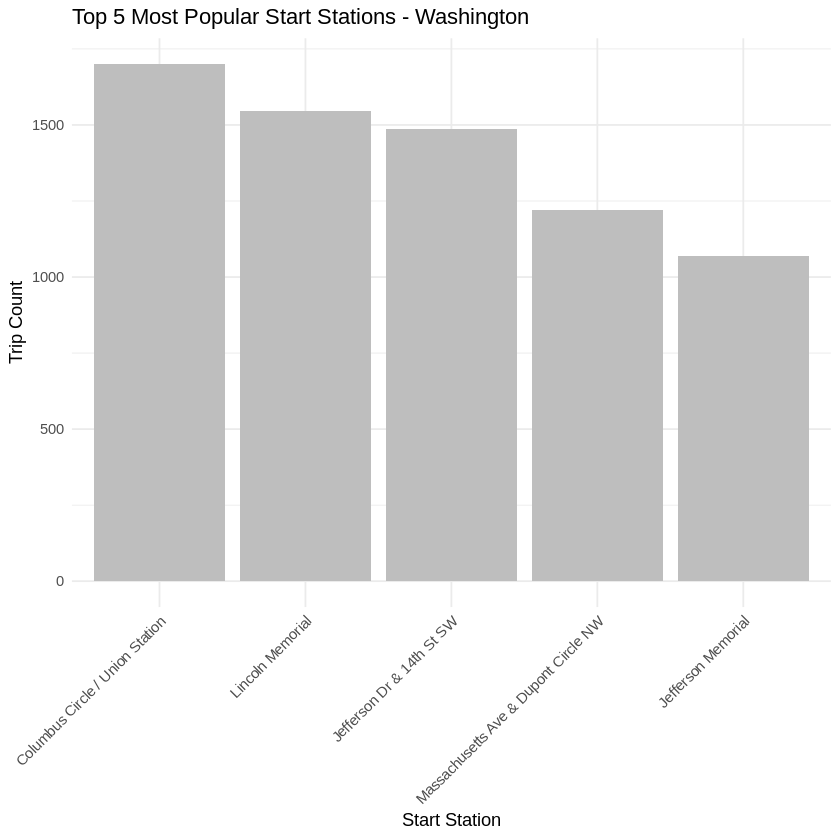

In [189]:
plot_most_popular_start(wash_most_popular_start, "Washington")


Now let's look at most popular ending station.

In [190]:
# function to get the most popular end station for a dataset
most_popular_station_end <- function(data) {
  data %>%
    group_by(End.Station) %>%  #group by end station
    summarise(Trip_Count = n()) %>%  # count trip numbers
    arrange(desc(Trip_Count)) %>%  # sort by top count
    head(5)   # top 5
}

In [191]:
# most popular end station for each dataset
chi_most_popular_end <- most_popular_station_end(chi)
ny_most_popular_end <- most_popular_station_end(ny)
wash_most_popular_end <- most_popular_station_end(wash)


In [192]:
chi_most_popular_end

End.Station,Trip_Count
Streeter Dr & Grand Ave,233
Clinton St & Madison St,145
Theater on the Lake,131
Lake Shore Dr & Monroe St,115
Clinton St & Washington Blvd,109


In [193]:
ny_most_popular_end

End.Station,Trip_Count
Pershing Square North,556
E 17 St & Broadway,445
Broadway & E 22 St,427
W 21 St & 6 Ave,365
W 20 St & 11 Ave,344


In [194]:
wash_most_popular_end

End.Station,Trip_Count
Columbus Circle / Union Station,1767
Jefferson Dr & 14th St SW,1603
Lincoln Memorial,1514
Massachusetts Ave & Dupont Circle NW,1344
Smithsonian-National Mall / Jefferson Dr & 12th St SW,1103


In [195]:
# Function to plot bar chart for most popular end stations
plot_most_popular_end <- function(data, source_name) {
  ggplot(data, aes(x = reorder(End.Station, -Trip_Count), y = Trip_Count)) +  # order by Trip_Count
    geom_bar(stat = "identity", fill = "grey") +  
    labs(
      title = paste("Top 5 Most Popular End Stations -", source_name),
      x = "End Station",
      y = "Trip Count"
    ) +
    theme_minimal() +  # clean theme
    theme(axis.text.x = element_text(angle = 45, hjust = 1))  # rotate x-axis labels for better readability
}

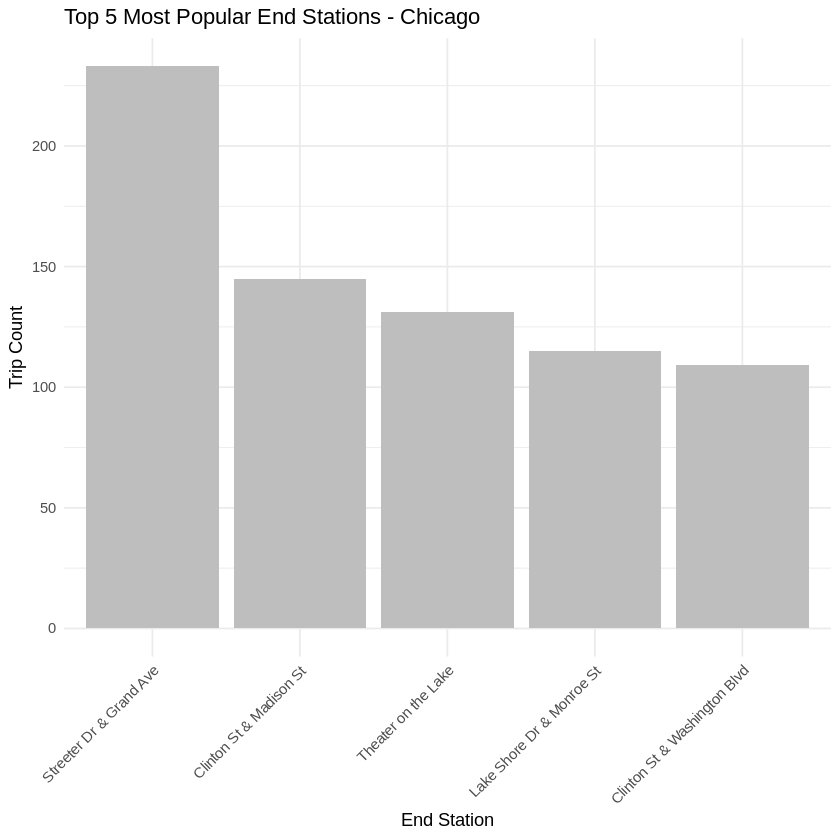

In [196]:
plot_most_popular_end(chi_most_popular_end, "Chicago")

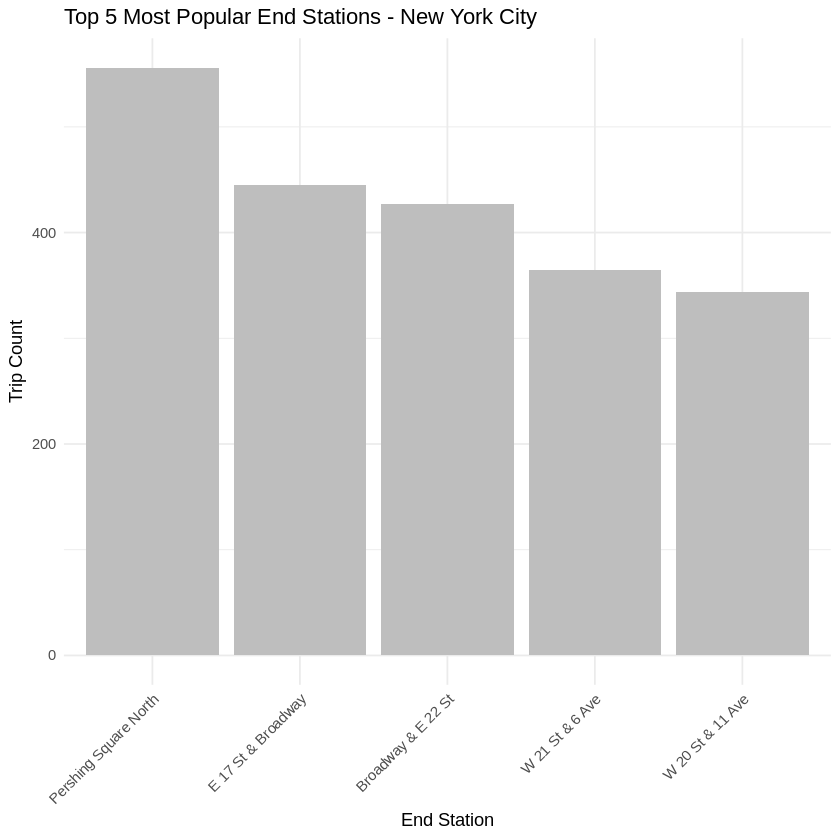

In [197]:
plot_most_popular_end(ny_most_popular_end, "New York City")

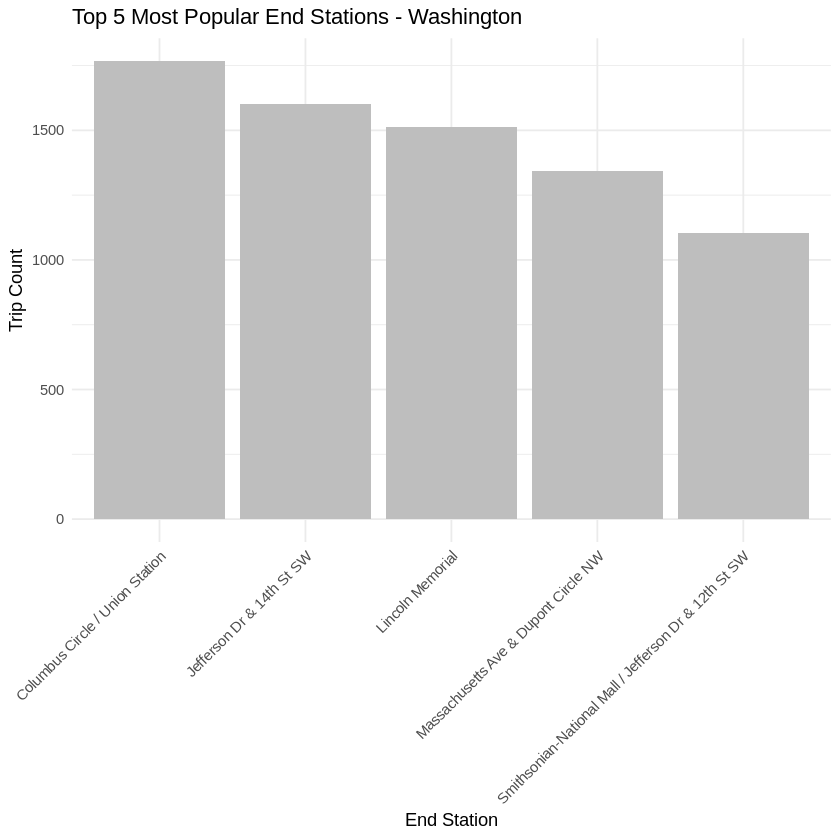

In [198]:
plot_most_popular_end(wash_most_popular_end, "Washington")

**It looks like the top most popular start and end station is the same across the 3 sources. For Chicago, the rest of the top 5 differs for starting and ending station. For example, Theater on the Lake is the 3rd most popular end station, but isn't listed in the top 5 most popular starting stations at all. For New York City, there's an over 200 trip count difference between the number 1 and number 2 most popular starting stations. While there may be commonalities between the top 5 most popular stations for both start and end, the only one that's the exact same across all 3 sources is the number 1 spot. To investigate this further, it would be interesting to include things like tourist attractions/popular locations, to see if that explains the differences. For example, with Theater on the Lake being a popular ending station in Chicago but not a popular starting station, could it be that there is some sort of event that goes late into the night at that station, and therefore riders tend to use other means to get back (like rideshares?), having some additional attractions information would help us investigate this further.**

### Question 3

**What is the average trip duration across the 3 data sources?**

In [205]:
# Function to calculate average trip duration
average_trip_duration <- function(data, source_name) {
  data %>%
    mutate(Trip.Duration = as.numeric(Trip.Duration)) %>%  # make sure trip duration is numeric
    summarise(Average_Duration = mean(Trip.Duration, na.rm = TRUE)) %>% 
    mutate(Source = source_name)  # Add source name for identification
}

In [206]:
# Calculate average trip duration for each dataset
chi_avg_duration <- average_trip_duration(chi, "Chicago")
ny_avg_duration <- average_trip_duration(ny, "New York City")
wash_avg_duration <- average_trip_duration(wash, "Washington")

In [207]:
# Combine the results into one dataframe
avg_duration_data <- bind_rows(chi_avg_duration, ny_avg_duration, wash_avg_duration)

In [208]:
avg_duration_data

Average_Duration,Source
937.1728,Chicago
903.6147,New York City
1233.9533,Washington


Let's show this as a visual

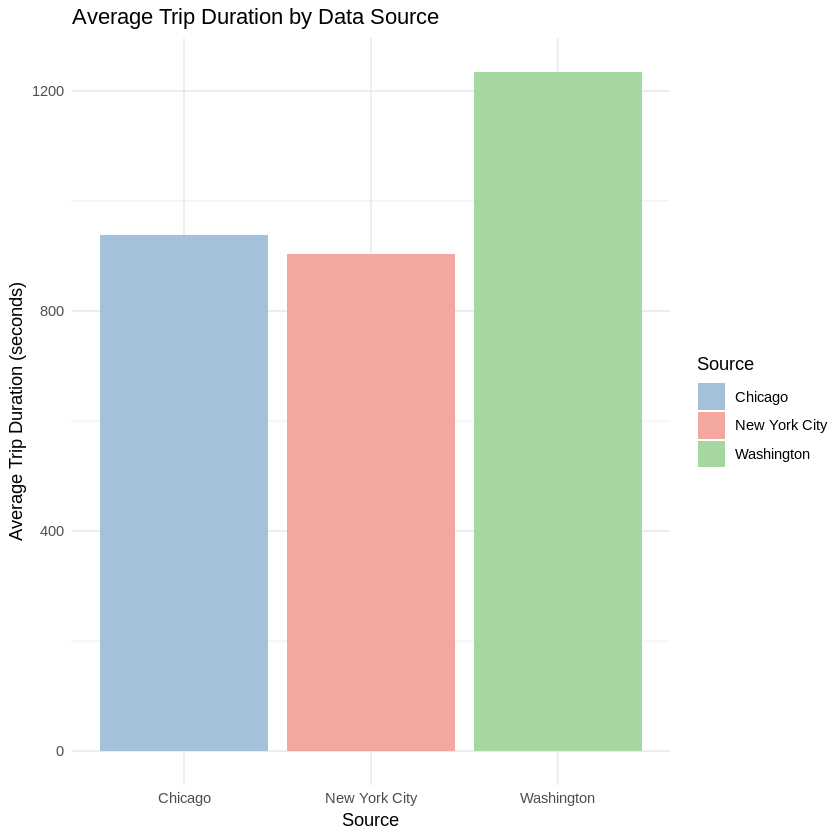

In [210]:
# plot average trip duration for each dataset
ggplot(avg_duration_data, aes(x = Source, y = Average_Duration, fill = Source)) +
  geom_bar(stat = "identity") +
  labs(
    title = "Average Trip Duration by Data Source",
    x = "Source",
    y = "Average Trip Duration (seconds)"
  ) +
  theme_minimal() +
  scale_fill_manual(values = c("Chicago" = "#A3C1DA", "New York City" = "#F4A6A1", "Washington" = "#A6D7A1"))



**IT looks like Washington has the longest average duration, by around 5 minutes. Both Chicago and New York City have slightly closer average durations (around 40 seconds), despite there being such a large discrepancy between the total trip counts between the two cities. This could be due to a number of reasons. This may be explained by Washington having data for multiple cities and therefore more data to go on, with more diverse layouts. It could also be due to how densely packed the areas being observed are. For example, New York City has the second highest trip count, but is the lowest for average duration. If attractions are closer together in NYC, that may explain the shorter durations. Including something like city size and population may be a helpful additional insight for further research.**


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')